In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

path = "..\\img\\photo_2023-07-31_23-02-41.jpg"

# [Smoothing Images](https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html)

In [ ]:
img = cv.imread(path)
assert img is not None

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title("Averaging")
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
blur = cv.blur(img, (5, 5))
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title("Blurred")
plt.xticks([]), plt.yticks([])
plt.show()

Более приятный блюр за счёт большего влияния соседних и меньшего влияния данных

In [ ]:
blur = cv.GaussianBlur(img, (5, 5), 0)
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title("Blurred")
plt.xticks([]), plt.yticks([])
plt.show()

Хорошо фильтрует шумы белых и чёрных пикселей (salt-and-peper)

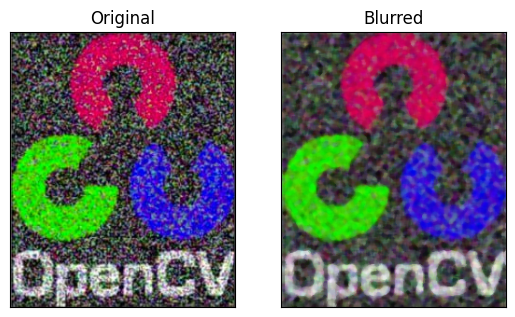

In [6]:
noise_salt = cv.imread("..\\img\\noise_salt.jpg")
median = cv.medianBlur(noise_salt, 5)
plt.subplot(121), plt.imshow(noise_salt), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title("Blurred")
plt.xticks([]), plt.yticks([])
plt.show()

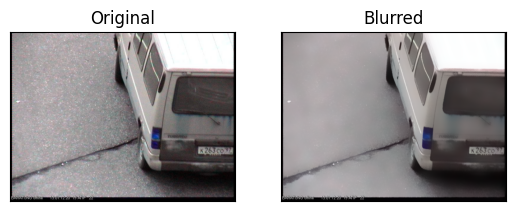

In [19]:
car = cv.imread("..\\img\\01-541.jpg")
blur = cv.bilateralFilter(car, 40, 75, 75)
plt.subplot(121), plt.imshow(car), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title("Blurred")
plt.xticks([]), plt.yticks([])
plt.show()

# [Image Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)

In [ ]:
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
titles = ["Original Image", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], "gray", vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(
    img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2
)
titles = [
    "Original Image",
    "Global Thresholding (v = 127)",
    "Adaptive Mean Thresholding",
    "Adaptive Gaussian Thresholding",
]
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = [
    "Original Noisy Image",
    "Histogram",
    "Global Thresholding (v=127)",
    "Original Noisy Image",
    "Histogram",
    "Otsu's Thresholding",
    "Gaussian filtered Image",
    "Histogram",
    "Otsu's Thresholding",
]
for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], "gray")
    plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], "gray")
    plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
plt.show()

# [Contours in OpenCV](https://docs.opencv.org/3.4/d3/d05/tutorial_py_table_of_contents_contours.html)

In [ ]:
im = cv.imread(path)
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(im, contours, -1, (0, 255, 0), 3)
plt.imshow(im)

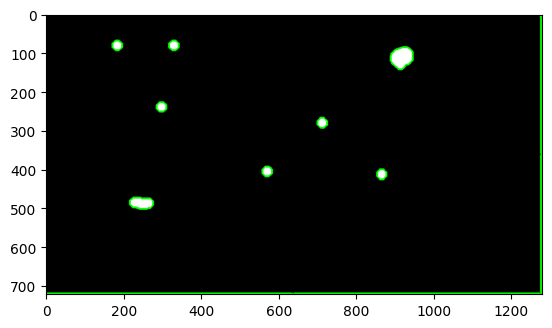

In [16]:
im = cv.imread("..\\img\\dots.jpg")
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(im, contours, -1, (0, 255, 0), 3)
plt.imshow(im)